# Ponderada Semana 7 - Professor Hayashi
## Aluna: Mariana Brasil Gorresen

### Barema Adalove
Escolha um dataset do Kaggle de série temporal.

Descreva as colunas do dataset.

Escolha uma métrica e justifique sua escolha de acordo com o tipo de problema tratado.

Implemente um modelo de predição usando uma RNN e apresente os resultados de treinamento de acordo com a métrica selecionada, e um gráfico comparando o valor real com o valor predito.

Entregue seu trabalho em formato IPYNB no GitHub com acesso liberado ao professor.


### Importação de bibliotecas e dataset do Kaggle


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from math import sqrt

# https://www.kaggle.com/datasets/gregoryoliveira/brazil-weather-information-by-inmet
df = pd.read_csv('/content/weather_2000.csv')

### Exploração do Dataset

In [31]:
df.head(-10)

,DATA (YYYY-MM-DD),Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",ESTACAO
0,2000-05-07,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A001
1,2000-05-07,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A001
2,2000-05-07,02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A001
3,2000-05-07,03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A001
4,2000-05-07,04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,2000-12-31,09:00,0.0,1008.8,1008.8,1008.3,42.0,18.4,15.2,18.4,17.8,15.2,14.9,84.0,81.0,81.0,80.0,2.7,1.0,A801
25162,2000-12-31,10:00,0.0,1009.5,1009.5,1008.8,556.0,20.8,15.4,20.8,18.5,15.7,15.0,81.0,71.0,71.0,89.0,3.5,1.5,A801
25163,2000-12-31,11:00,0.0,1009.7,1009.8,1009.5,1192.0,22.5,16.7,22.9,20.8,16.7,15.3,74.0,64.0,70.0,113.0,3.4,1.3,A801
25164,2000-12-31,12:00,0.0,1010.1,1010.1,1009.7,1957.0,24.5,16.5,24.5,22.3,17.1,15.7,69.0,61.0,61.0,80.0,2.9,1.0,A801


In [32]:
df.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,19827.000000,17732.000000,19722.000000,19722.000000,10570.000000,19826.000000,19826.000000,19722.000000,19722.000000,19722.000000,19722.000000,19722.000000,19722.000000,19826.000000,19746.000000,19648.000000,19789.000000
mean,0.125717,972.595438,976.682172,976.157104,1458.234626,23.346575,17.618657,23.907210,22.819410,18.100421,17.178572,75.703630,70.076514,72.913548,152.169857,5.050478,2.025661
std,1.271184,55.249203,53.263042,53.231436,1125.100956,4.615709,5.227845,4.683581,4.531508,5.160275,5.284664,17.678969,18.802904,18.371750,101.586703,4.858318,1.405413
min,0.000000,877.800000,878.100000,877.800000,0.000000,7.100000,-3.800000,7.600000,6.900000,-2.100000,-5.000000,15.000000,13.000000,13.000000,1.000000,0.000000,0.000000
25%,0.000000,889.800000,891.200000,890.800000,394.250000,20.000000,14.000000,20.500000,19.500000,14.500000,13.600000,65.000000,58.000000,61.000000,78.000000,2.700000,1.000000
50%,0.000000,1004.400000,1005.200000,1004.600000,1312.000000,23.900000,18.400000,24.300000,23.500000,18.900000,18.100000,80.000000,73.000000,76.000000,121.000000,4.500000,1.800000
75%,0.000000,1009.700000,1009.800000,1009.400000,2427.000000,26.400000,22.100000,27.100000,25.800000,22.500000,21.800000,91.000000,86.000000,88.000000,221.000000,6.500000,2.800000
max,70.800000,1026.800000,1026.900000,1026.700000,3992.000000,38.200000,26.900000,38.200000,37.600000,27.600000,25.200000,99.000000,98.000000,99.000000,360.000000,99.700000,10.000000


#### ***Descrição das colunas***

'DATA (YYYY-MM-DD)': 'Data da observação meteorológica no formato ano-mês-dia.',

'Hora UTC': 'Hora da coleta da informação (UTC).',

'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Quantidade total de chuva (em milímetros) no horário.',

'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Pressão atmosférica ao nível da estação (milibares).',

'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Pressão máxima registrada na hora anterior.',

'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Pressão mínima registrada na hora anterior.',

'RADIACAO GLOBAL (KJ/m²)': 'Radiação solar global acumulada no horário (quilojoules por metro quadrado).',

'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Temperatura do ar medida no horário (°C).',

'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Temperatura do ponto de orvalho (indica umidade).',

'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'Maior temperatura registrada na hora anterior.',

'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'Menor temperatura registrada na hora anterior.',

'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'Maior ponto de orvalho na hora anterior.',

'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'Menor ponto de orvalho na hora anterior.',

'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Maior umidade relativa do ar (%) na hora anterior.',

'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Menor umidade relativa do ar (%) na hora anterior.',

'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Umidade relativa do ar no horário da medição.',

'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Direção do vento em graus no horário.',

'VENTO, RAJADA MAXIMA (m/s)': 'Rajada máxima de vento registrada no horário (m/s).',

'VENTO, VELOCIDADE HORARIA (m/s)': 'Velocidade média do vento no horário (m/s).',

'ESTACAO': 'Código identificador da estação meteorológica.'

### Definição do Problema

#### ***Objetivo***: Prever a temperatura máxima do próximo dia

#### ***Métrica escolhida:*** RMSE: Mede o erro médio entre os valores reais e previstos.
Foi escolhida essa métrica pois esse é um problema de regressão, prever um valor contínuo.

#### ***Colunas utilizadas para a predição***:
'DATA (YYYY-MM-DD)',

'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'


### Pré Processamento das colunas

In [22]:
# Renomeando as colunas
df.rename(columns={
    'DATA (YYYY-MM-DD)': 'Data',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'TempMax'
}, inplace=True)

# Convertendo as datas
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Filtrando e tratando
df = df[['Data', 'TempMax']].dropna()
df = df.sort_values('Data')
df.set_index('Data', inplace=True)

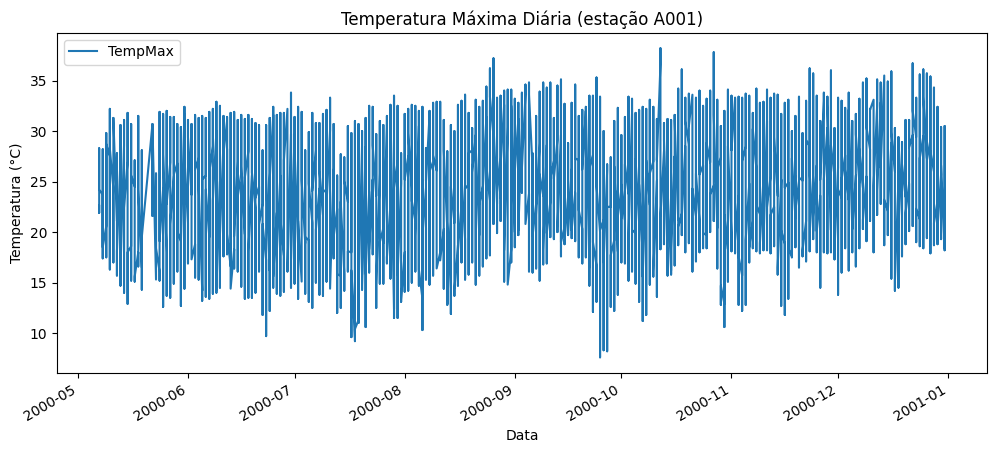

In [23]:
# Visualizando a série temporal
df.plot(figsize=(12,5), title='Temperatura Máxima Diária (estação A001)')
plt.ylabel('Temperatura (°C)')
plt.show()


In [24]:
# Normalização dos dados
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['TempMax']])

In [25]:
# Criando sequencias
def create_dataset(series, window=30):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_dataset(scaled_data, window=window_size)

# Divisão treino/teste
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Ajuste para RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


### Definição do Modelo

In [26]:
# Definindo o modelo SimpleRNN
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Treino e Predição

In [27]:
# Treino
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predição
y_pred = model.predict(X_test)

# Inverter normalização
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0188 - val_loss: 0.0096
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0116 - val_loss: 0.0087
Epoch 3/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0122 - val_loss: 0.0087
Epoch 4/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 5/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0118 - val_loss: 0.0086
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0118 - val_loss: 0.0083
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0113 - val_loss: 0.0086
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0113 - val_loss: 0.0090
Epoch 9/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 10/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0113 - val_loss: 0.0084
Epoch 11/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 12/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/s

### Resultados

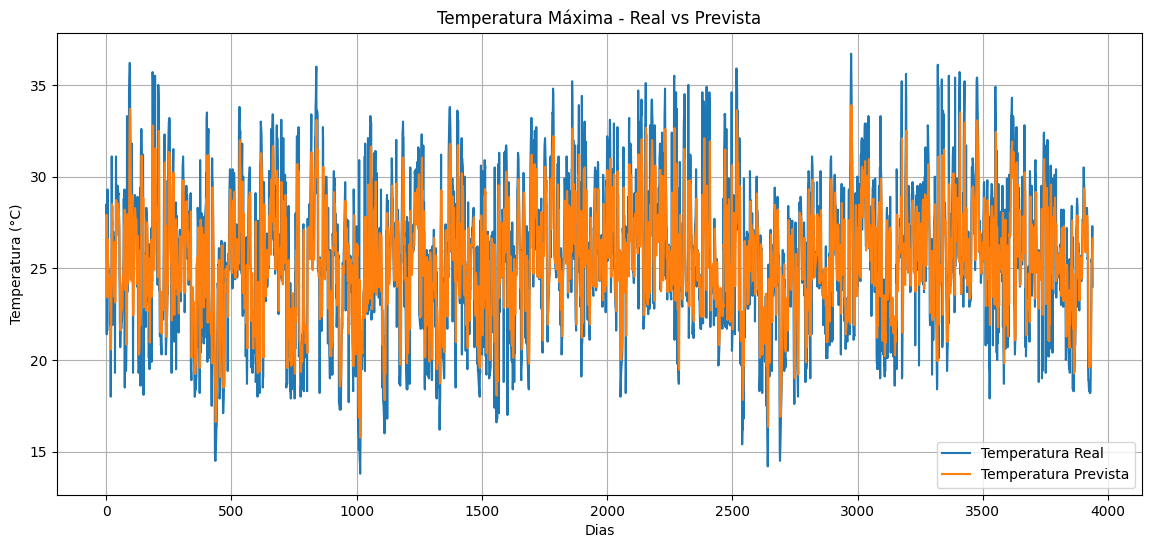

In [19]:
# Plotando visualização dos resultados reais e os previstos pelo modelo
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Temperatura Real')
plt.plot(y_pred_inv, label='Temperatura Prevista')
plt.title('Temperatura Máxima - Real vs Prevista (Basic RNN)')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid()
plt.show()

In [33]:
# RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {rmse:.2f} °C')

RMSE: 2.87 °C


### Análise do Resultado final

O modelo RNN conseguiu aprender o padrão geral da série temporal de temperatura máxima ao longo dos anos, o que é visível pela sobreposição das curvas real e prevista no gráfico.

O erro médio quadrático (RMSE) ficou em 2.87 °C, o que indica um desempenho razoável para um modelo simples como a SimpleRNN, considerando a variabilidade natural do clima.

É possível perceber que o modelo consegue seguir a tendência geral, mas tem dificuldades em capturar picos de temperatura (ex: extremos de calor ou frio) onde se mostrou estar mais perto da média.